In [1]:
from classevy.klas import StudentGroup, Klas, Plan, PlanPopulation

In [2]:
students = StudentGroup('../data/students.csv')

In [35]:
pop = PlanPopulation(students, 500, 2)

With a given list of students, there's only so much you can do. I.e. if there's an odd number of students and an even number of classes, then you can't have classes of the same size, or with the same average gender. So on each plan, based on the student list, we can define the best outcome possible on each target. `spread_age`, `spread_gender` and `spread_score` of a `Plan` are defined as the standard deviation across classes of `age`, `gender` and `score`, respectively. In turn, those attributes per class are defined as the average across the students in the class.
So if the students for example consist of 5 girls and 6 boys, the best possible `Plan` will have 3 boys + 3 girls and 3 boys + 2 girls in 2 classes. 
That means that for:
- Class 1:
    - gender = 0
    - size = 6
- Class 2:
    - gender = (3-2)/5 = -1/5 (boys are coded as 1, girls as -1)
    - size = 5
    
Since standard deviation is defined as:

$\sigma = \sqrt{\frac{\sum{(x_i-\mu)^2}}{N}}$

This results in a `spread_gender` of 0.1 and `spread_size` of 0.5. It's futile to try to get better results than that.
Note that if the number of boys and girls are both odd, there's an inherent tension between class size and average gender. Take the example of 5 and 5: average gender being equal in both classes would lead to 2 boys + 2 girls and 3+3. However, we could also look at targeting abs(average(gender)) being equal. But it's quickly clear why that wouldn't work. Because then having 5 boys in 1 and 5 girls in the other class would be a perfect solution. By minimizing the spread on gender, we target at the same time average gender in each class toward zero. Because shifting the balance inherently increases the spread.

Doing generation 0.
Doing generation 1.
Doing generation 2.
Doing generation 3.
Doing generation 4.
Doing generation 5.
Stop criteria met, stopping early.
Mean and best values for goals haven't changed for 5 generations


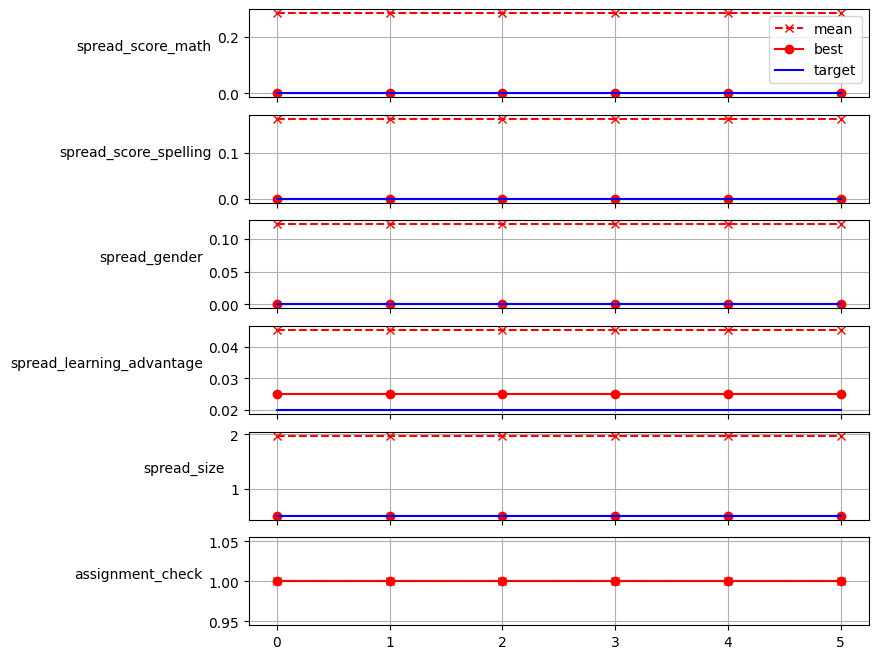

In [36]:
pop.run(n_gen=20, mutprob=0.4, stop_on_steady_n=5, verbose=True)
pop.plot_progress()

In [43]:
import numpy as np
all_fa = np.array([list(p.final_assignment) for p in pop.individuals])
len(np.unique(all_fa, axis=0))

496

In [44]:
front = pop.pareto()
len(front)

500

In [46]:
front['sum'] = sum([front[col] for col in pop.goals_names])

In [48]:
front.sort_values('spread_size')

,Individual,spread_score_math,spread_score_spelling,spread_gender,spread_learning_advantage,spread_size,assignment_check,sum
216,<classevy.klas.PlanPopulation.__init__.<locals...,0.445055,0.173077,0.049451,0.038462,0.5,True,1.206044
195,<classevy.klas.PlanPopulation.__init__.<locals...,0.074176,0.46978,0.197802,0.038462,0.5,True,1.28022
196,<classevy.klas.PlanPopulation.__init__.<locals...,0.445055,0.024725,0.098901,0.112637,0.5,True,1.181319
203,<classevy.klas.PlanPopulation.__init__.<locals...,0.445055,0.049451,0.197802,0.038462,0.5,True,1.230769
204,<classevy.klas.PlanPopulation.__init__.<locals...,0.222527,0.321429,0.247253,0.038462,0.5,True,1.32967
...,...,...,...,...,...,...,...,...
493,<classevy.klas.PlanPopulation.__init__.<locals...,0.0,0.064286,0.064286,0.071429,6.5,True,6.7
198,<classevy.klas.PlanPopulation.__init__.<locals...,0.385714,0.225,0.128571,0.025,6.5,True,7.264286
386,<classevy.klas.PlanPopulation.__init__.<locals...,0.385714,0.225,0.257143,0.025,6.5,True,7.392857
162,<classevy.klas.PlanPopulation.__init__.<locals...,0.857143,0.107143,0.0,0.130952,7.5,True,8.595238


In [12]:
best_plan = front.sort_values('sum').iloc[0].values[0]

In [13]:
best_plan.classes_gender

[0.23076923076923078, 0.42857142857142855]

In [14]:
students['gender'].mean()

0.3333333333333333

In [15]:
best_plan.classes[0].print_names()

pol
katrien
ahmed
darius
mario
maria
peter
pieter
pier
maarten
sanne
carla
klara


In [16]:
best_plan.classes[1].print_names()

luuk
pat
jos
mo
tia
karl
siem
pius
marius
marie
pieter
rinus
karla
clara


In [17]:
best_plan.classes_size

[13, 14]

In [18]:
best_plan.classes_gender

[0.23076923076923078, 0.42857142857142855]

In [19]:
best_plan.classes_score_math

[7.0, 7.0]

In [20]:
best_plan.check_assignment()

True

In [21]:
for plan in front['Individual']:
    print(plan.check_assignment())

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [22]:
best_plan.students

,name,score_math,score_spelling,gender,learning_advantage,not_together,together,preferences,options,dna_assignment,final_assignment,pref_satisfied
number,,,,,,,,,,,,
1,luuk,10,8,1,1,(),(),"(1,)","[0, 1]",1,1.0,1.0
2,pat,9,7,1,0,(),(),"(2,)","[0, 1]",1,1.0,1.0
3,jos,8,6,1,0,(),(),"(3,)","[0, 1]",1,1.0,1.0
4,pol,7,9,1,0,(),(),"(4,)","[0, 1]",0,0.0,1.0
5,katrien,6,7,-1,0,(),(),"(5,)","[0, 1]",0,0.0,1.0
6,mo,5,5,1,0,(),(),"(6,)","[0, 1]",1,1.0,1.0
7,tia,6,7,-1,0,(),(),"(7,)","[0, 1]",1,1.0,1.0
8,karl,7,4,1,0,(),(),"(8,)","[0, 1]",1,1.0,1.0
9,siem,8,3,1,0,(),(),"(9,)","[0, 1]",1,1.0,1.0


In [23]:
pop.summary()

{'spread_score_math': 0.21370102324146445,
 'spread_score_spelling': 0.20851216185775004,
 'spread_gender': 0.1787095624963272,
 'spread_learning_advantage': 0.044053768943474826,
 'spread_size': 1.9,
 'assignment_check': 1.0}

In [26]:
best_plan.classes_df_output[0]

,name,score_math,score_spelling,gender,learning_advantage,not_together,together,preferences,pref_satisfied
number,,,,,,,,,
4,pol,7,9,1,0,(),(),"(4,)",1.0
5,katrien,6,7,-1,0,(),(),"(5,)",1.0
10,ahmed,8,8,1,0,(),(),"(10,)",1.0
12,darius,4,5,1,-1,(),(),"(12,)",1.0
14,mario,9,6,1,0,(),(),"(14,)",1.0
15,maria,7,8,-1,0,(),(),"(15,)",1.0
17,peter,9,8,1,0,(),(),"(17,)",1.0
18,pieter,10,7,1,1,(),(),"(18,)",1.0
19,pier,6,6,1,0,(),(),"(19,)",1.0


In [27]:
best_plan.df_means_classes[0]

,name,score_math,score_spelling,gender,learning_advantage,not_together,together,preferences,pref_satisfied
Average,NaN,7.0,7.153846,0.230769,0.0,NaN,NaN,NaN,NaN


In [28]:
pd.concat([best_plan.classes_df_output[0], best_plan.df_means_classes[0]])

,name,score_math,score_spelling,gender,learning_advantage,not_together,together,preferences,pref_satisfied
4,pol,7,9,1,0,(),(),"(4,)",1.0
5,katrien,6,7,-1,0,(),(),"(5,)",1.0
10,ahmed,8,8,1,0,(),(),"(10,)",1.0
12,darius,4,5,1,-1,(),(),"(12,)",1.0
14,mario,9,6,1,0,(),(),"(14,)",1.0
15,maria,7,8,-1,0,(),(),"(15,)",1.0
17,peter,9,8,1,0,(),(),"(17,)",1.0
18,pieter,10,7,1,1,(),(),"(18,)",1.0
19,pier,6,6,1,0,(),(),"(19,)",1.0
21,maarten,6,8,1,0,(),(),"(21,)",1.0
